Elizabeth produced some predictions for expected correlation functions from her HOD. I'm going to plot those against the results I've calculated via halotools.

In [1]:
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from itertools import cycle
from collections import defaultdict
colors = cycle(sns.color_palette())

In [2]:
a = 1.0
outputdir = '/u/ki/swmclau2/des/HODOutput/'

sim = 'aardvark'
datadir = outputdir+'%s_step_tests/'%sim

#rbins = np.logspace(-1, 1.25, 15)
#rbin_centers = (rbins[1:]+rbins[:-1])/2

In [3]:
%%bash 
ls /u/ki/swmclau2/des/HODOutput/xi_aardvark/

xi_redm12.0
xi_redm12.5
xi_redm13.0
xi_redm13.5
xi_threshold12.0
xi_threshold12.5
xi_threshold13.0
xi_threshold13.5


In [4]:
data = {}
predictions = {}
#for mMin in [12.0+i*0.25 for i in xrange(8)]:
for mMin in [12.0, 12.50, 13.0,13.5, 15.5]:
    data[mMin] = np.loadtxt(datadir+'corr_%.3f_default_mm_%.2f.npy'%(a,mMin) )
    #predictions[mMin] = np.loadtxt('/u/ki/swmclau2/des/HODOutput/xi_aardvark/xi_redm%.1f'%(mMin) )

In [5]:
print data[12.0].shape

(4, 19)


In [6]:
if data[12.0].shape[1] == 19:
    rbins = np.logspace(-1, 1.7, 20)
else:
    rbins = np.logspace(-1, 1.25, 15)
rbin_centers = (rbins[1:]+rbins[:-1])/2 #Here or in the loop?

/u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


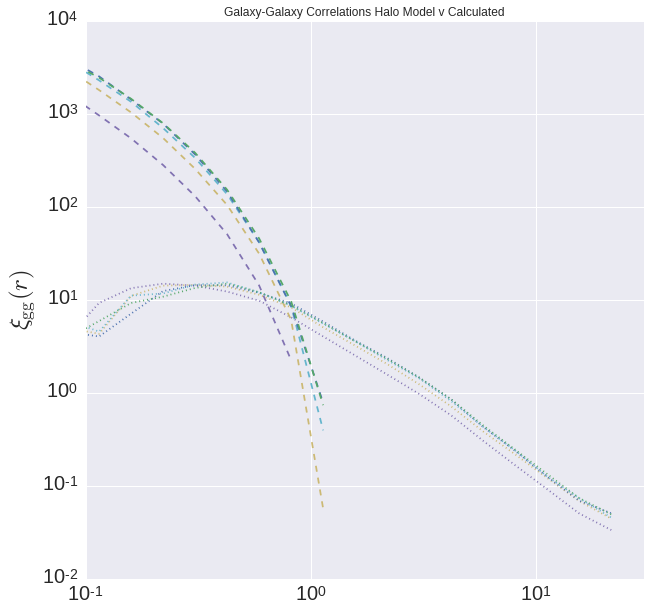

In [10]:
fig = plt.figure(figsize = (10,10))
for mMin, color in zip(sorted(data.iterkeys()), colors):
    #rbins = np.logspace(-1, 1.7, 20)
    #rbin_centers = (rbins[1:]+rbins[:-1])/2

    #plt.plot(data[mMin][0,:]/2, data[mMin][1,:], label = '%s default MinMass = %.2f'%(sim, mMin), color = color)
    plt.plot(data[mMin][0,:]/2, data[mMin][2,:],ls = '--', color = color)
    plt.plot(data[mMin][0,:]/2, data[mMin][3,:],ls = ':', color = color)

    #plt.plot(rbin_centers, data[mMin], label = '%s RedMagic MinMass = %.2f'%(sim, mMin), color = color)
    #plt.plot(predictions[mMin][:,0], predictions[mMin][:,1], ls = '--', color = color  )
    #plt.plot(predictions[mMin][:,0], predictions[mMin][:,2], ls = '--', color = color  )

    
plt.title('Galaxy-Galaxy Correlations Halo Model v Calculated')
plt.xlim(xmin = 0.1, xmax = 30)
plt.ylim(ymin = 1e-2, ymax = 1e4)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
plt.legend(loc='best', fontsize=20)  

plt.show()

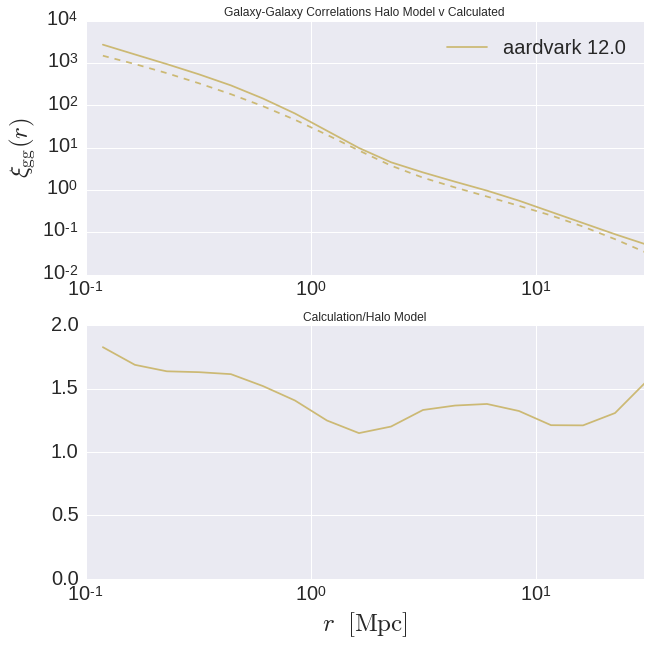

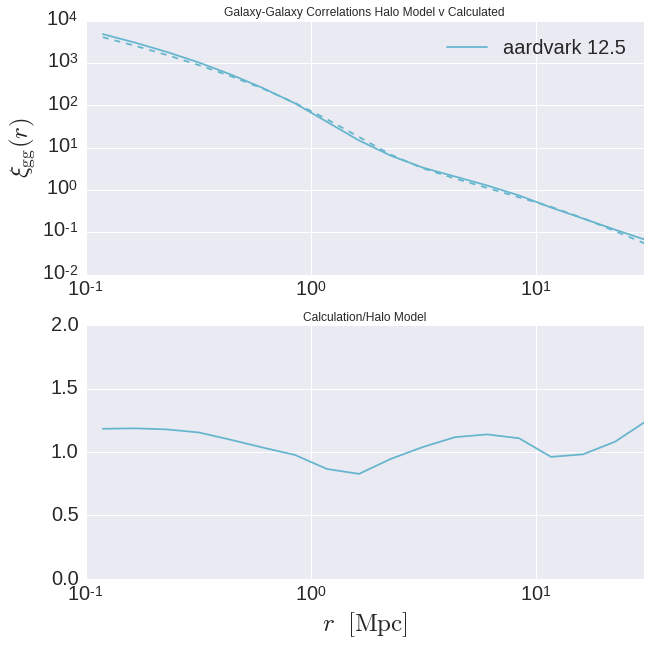

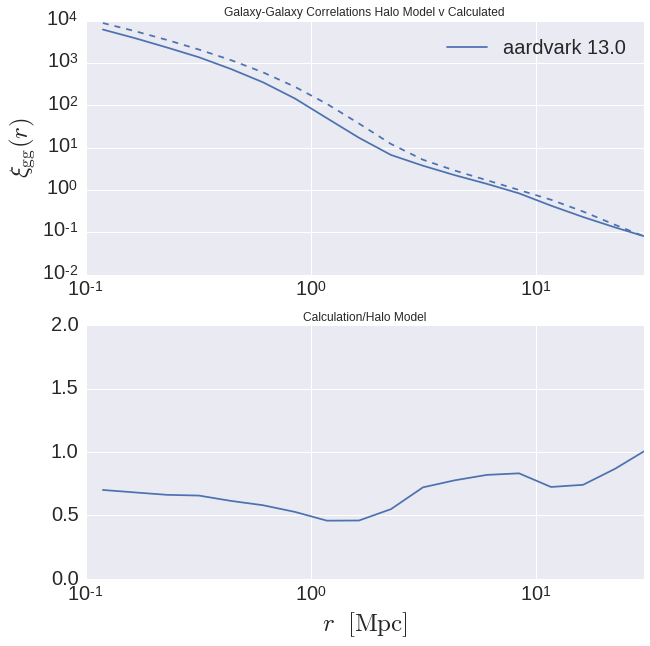

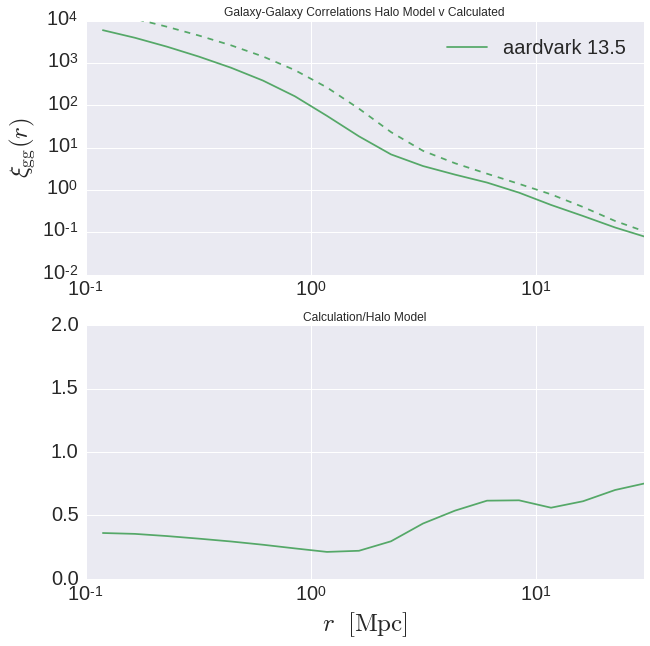

In [78]:
for label, color in zip(sorted(data.iterkeys()), colors):
    fig = plt.figure(figsize = (10,10))

    plt.subplot(211)
    plt.plot(data[label][0,:]/2, data[label][1,:] , label = '%s %s'%(sim, label), color = color)
    plt.plot(predictions[label][:,0],predictions[label][:,1], ls = '--', color = color)
    
    plt.title('Galaxy-Galaxy Correlations Halo Model v Calculated')
    plt.xlim(xmin = 0.1, xmax = 30)
    plt.ylim(ymin = 1e-2, ymax = 1e4)
    plt.loglog()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    #plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
    plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
    plt.legend(loc='best', fontsize=20)
    
    plt.subplot(212)
    plt.title('Calculation/Halo Model')
    plt.plot(data[label][0,:]/2, data[label][1,:]/predictions[label][:,1], color = color)
    
    plt.xlim(xmin = 0.1, xmax = 30)
    plt.ylim(ymin = 0, ymax = 2)
    #plt.loglog()
    plt.xscale('log')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)    

    plt.show()

In [79]:
ratio_prediction = {12.0: 0.60,
12.50:  1.00,
13.00:  1.58,
13.50:  2.42}

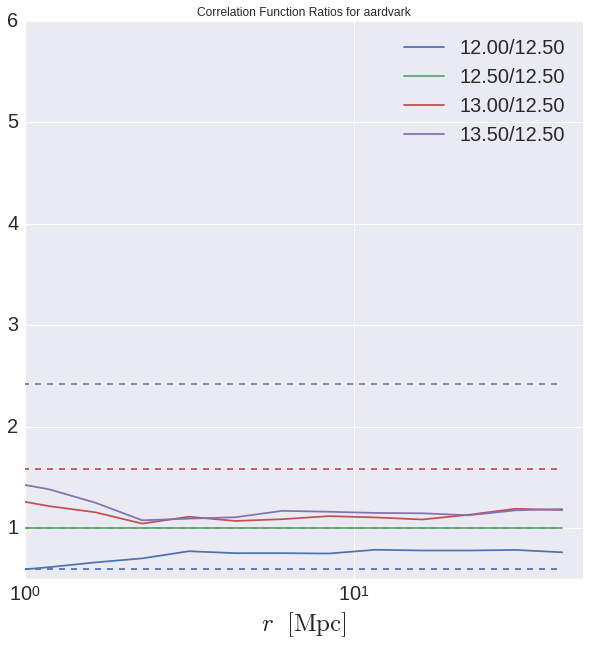

In [84]:
colors = cycle(sns.color_palette())

rbins = np.logspace(-1, 1.7, 20)
rbin_centers = (rbins[1:]+rbins[:-1])/2

fig = plt.figure(figsize = (10,10))
#for vn, color in zip(version_names, colors):
lowest_mass = 12.5#min(data.iterkeys())
for mm, color in zip(sorted(data.iterkeys()), colors):
    #print '%.2f/12.25:\t'%(mm), '%.2f'%np.mean(data[mm][6:]/data[12.25][6:])
    plt.plot(data[mm][0,:]/2, data[mm][1,:]/data[lowest_mass][1,:], label = '%.2f/%.2f'%(mm, lowest_mass), color = color)
    plt.plot(predictions[mm][:,0], ratio_prediction[mm]*np.ones(predictions[mm][:,0].shape), ls = '--',color = color)
        
plt.title('Correlation Function Ratios for %s'%sim)
plt.xlim(xmin = 1, xmax = 50)

plt.ylim(ymin = 0.5, ymax = 6)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.legend(loc='best', fontsize=20)

plt.show()